# Calculating Halo Mass Function
### Read in Data

In [1]:
from matplotlib import pyplot as plt
import h5py
import numpy as np
import matplotlib.gridspec as gridspec
import random
from astroML.correlation import two_point
import stats

cdm = h5py.File('Data/COLOR_CDM_DM_Haloes_z0.00.hdf5', 'r')
wdm = h5py.File('Data/COLOR_WDM_DM_Haloes_z0.00.hdf5', 'r')

print(cdm,wdm)

<HDF5 file "COLOR_CDM_DM_Haloes_z0.00.hdf5" (mode r)> <HDF5 file "COLOR_WDM_DM_Haloes_z0.00.hdf5" (mode r)>


In [2]:
# Access mass/position for wdm/cdm
print(list(cdm.keys()),list(wdm.keys()))

cdm_mass = cdm[list(cdm.keys())[0]][:]
cdm_position = cdm[list(cdm.keys())[1]][:]

wdm_mass = wdm[list(wdm.keys())[0]][:]
wdm_position = wdm[list(cdm.keys())[1]][:]

cdm_mass, cdm_position, wdm_mass, wdm_position

['HaloMass', 'HaloPos'] ['HaloMass', 'HaloPos']


(array([1.62182445e+14, 2.89476434e+14, 2.65510885e+14, ...,
        1.67210672e+08, 1.05606736e+08, 1.49609552e+08]),
 array([[10.93832207, 81.23078918, 54.77935028],
        [ 5.65795279, 75.58935547, 47.56488037],
        [ 9.07952595, 35.07923126, 54.54546738],
        ...,
        [ 1.47748184,  3.54455233, 99.53264618],
        [99.32190704,  2.56014371,  2.57368279],
        [99.0621109 ,  4.18381071,  2.89533401]]),
 array([1.46641357e+14, 2.85280284e+14, 2.59727578e+14, ...,
        1.05606736e+08, 1.58410112e+08, 1.58410112e+08]),
 array([[1.80150642e+01, 7.98655701e+01, 5.34328232e+01],
        [5.73223782e+00, 7.56417389e+01, 4.75691986e+01],
        [9.07071495e+00, 3.51130295e+01, 5.45637627e+01],
        ...,
        [6.02296066e+00, 5.05078554e+00, 9.79758301e+01],
        [5.75055540e-01, 3.26677370e+00, 3.52767438e-01],
        [2.07897183e-03, 3.23730040e+00, 9.97708917e-01]]))

### Create the Halo Mass Functions!

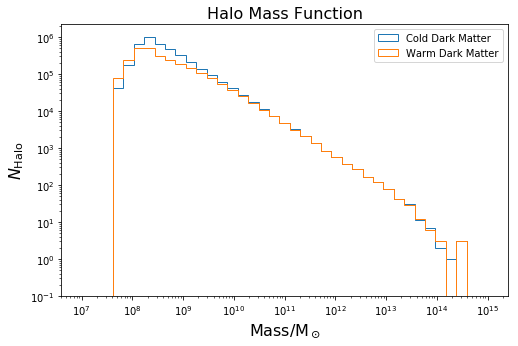

In [3]:
# Create a histogram
bins = np.logspace(7, 15, 40) #always pre-specify bins

fig = plt.figure(figsize = (8,5))
N_cdm, bins_cdm, patches_cdm = plt.hist(cdm_mass, bins = bins, log = True, histtype = 'step', label = "Cold Dark Matter")
N_wdm, bins_wdm, patches_wdm = plt.hist(wdm_mass, bins = bins, log = True, histtype = 'step', label = "Warm Dark Matter")
plt.title("Halo Mass Function", fontsize = 16)
plt.ylabel(r"$N_{\rm {Halo}}$", fontsize = 16)
plt.xlabel("Mass/M$_\odot$", fontsize = 16)
plt.xscale("Log")
plt.legend()
# plt.savefig("Images/Data1/HMF_Hist.png")
plt.show()

C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


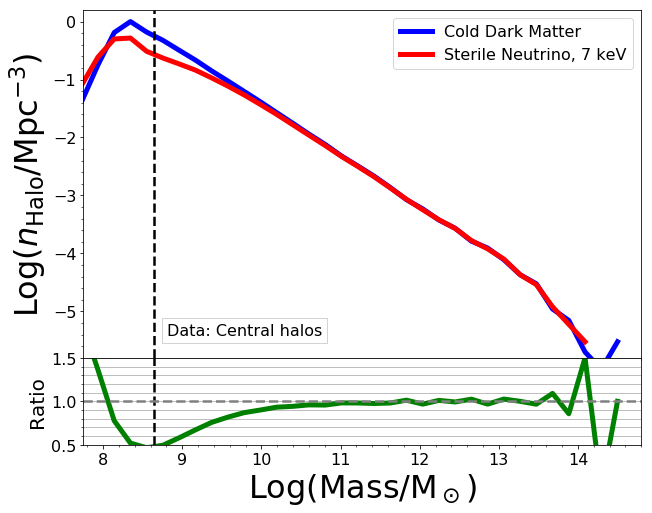

In [4]:
# line plot of histogram
# USE for report!!

volume = 100.0**3 #Mpc^3
n_cdm = N_cdm/volume
n_wdm = N_wdm/volume
m_res = np.log10(8.8*10**6*50)

textstr = 'Data: Central halos'
props = dict(facecolor='none', edgecolor='lightgrey', pad = 5.0)

plt.figure(figsize=(10,8))
grid = gridspec.GridSpec(2,1, height_ratios = [4,1])
grid.update(hspace = 0)
grid0 = plt.subplot(grid[0])
grid1 = plt.subplot(grid[1])
grid0.plot(np.log10(0.5*(bins[1:]+bins[:-1])), np.log10(n_cdm), label = "Cold Dark Matter", linewidth = 5, 
           color = "blue")
grid0.plot(np.log10(0.5*(bins[1:]+bins[:-1])), np.log10(n_wdm), label = "Sterile Neutrino, 7 keV", linewidth = 5, 
           color = "red")
grid0.axvline(x = m_res, color = "black", ls = "--", linewidth = 2.5)
#plt.title("Halo Mass Function", fontsize = 16)
grid0.set_ylabel(r"Log($n_{\rm {Halo}}$/Mpc$^{-3}$)", fontsize = 32)
grid0.legend(fontsize=16)
grid0.minorticks_on()
grid0.tick_params(labelsize=16)
grid0.set_ylim(-5.8, 0.2)
grid0.set_xlim(7.75, 14.8)
grid0.text(0.15, 0.1, textstr, transform=grid0.transAxes, fontsize=16,
        verticalalignment='top', bbox=props)

grid1.plot(np.log10(0.5*(bins[1:]+bins[:-1])), n_wdm/n_cdm, linewidth = 5, color = "green")
grid1.set_xlabel("Log(Mass/M$_\odot$)", fontsize = 32)
grid1.set_ylabel("Ratio", fontsize=20)
grid1.axvline(x = m_res, color = "black", ls = "--", linewidth = 2.5)
grid1.axhline(y = 1, color = "grey", ls = "--", linewidth = 2.5)
grid1.minorticks_on()
grid1.tick_params(labelsize=16)
grid1.set_ylim(0.5, 1.5)
grid1.set_xlim(7.75, 14.8)
grid1.yaxis.grid(which="both")

plt.savefig("Images/Data1/HMF.pdf")
plt.savefig("Images/Data1/HMF.png")
plt.show()

### Try adding error bars!

In [5]:
volume = 100.0**3 #Mpc^3

# Compute Poisson errors in each bin
errors_cdm = []
errors_wdm = []

for i in range(len(n_cdm)):
    errors_cdm.append(stats.poisson_err(N_cdm[i]))
for i in range(len(n_wdm)):
    errors_wdm.append(stats.poisson_err(N_wdm[i]))

# Turn into a numpy array
errors_cdm = np.array(errors_cdm)
errors_wdm = np.array(errors_wdm)

errLow_cdm = np.log10(errors_cdm[:,0] / volume)
errHigh_cdm = np.log10(errors_cdm[:,1]/ volume)

errLow_wdm = np.log10(errors_wdm[:,0] / volume)
errHigh_wdm = np.log10(errors_wdm[:,1]/ volume)

# The plt.errorbar module needs yerr to be inserted as a relative difference to the y-value of the coordinate.
low_lim_cdm = np.log10(n_cdm) - errLow_cdm
up_lim_cdm = errHigh_cdm - np.log10(n_cdm)

low_lim_wdm = np.log10(n_wdm) - errLow_wdm
up_lim_wdm = errHigh_wdm - np.log10(n_wdm)

# And now plot the result
low_lim_cdm, up_lim_cdm, low_lim_wdm, up_lim_wdm

C:\Users\shife\OneDrive\Harvard_Stuff\Astro_98\stats.py:27: RuntimeWarning: divide by zero encountered in double_scalars
  err_low = count * ( 1 - 1/(9 * count) - 1/(3 * np.sqrt(count))  )**3
C:\Users\shife\OneDrive\Harvard_Stuff\Astro_98\stats.py:27: RuntimeWarning: invalid value encountered in double_scalars
  err_low = count * ( 1 - 1/(9 * count) - 1/(3 * np.sqrt(count))  )**3
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log10
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log10


(array([           nan,            nan,            nan, 2.12371896e-03,
        1.02812353e-03, 5.41370674e-04, 4.35054243e-04, 5.36191108e-04,
        6.31284905e-04, 7.69128037e-04, 9.34643525e-04, 1.15893955e-03,
        1.41765728e-03, 1.74215649e-03, 2.14242856e-03, 2.65520410e-03,
        3.28723696e-03, 4.08508845e-03, 5.01913424e-03, 6.31484263e-03,
        7.70239095e-03, 9.44431641e-03, 1.18684999e-02, 1.51849355e-02,
        1.83056837e-02, 2.29638645e-02, 2.71651197e-02, 3.54226848e-02,
        4.08644337e-02, 5.21878830e-02, 7.15236727e-02, 8.69546492e-02,
        1.52715644e-01, 1.99327344e-01, 4.48535152e-01, 7.65817515e-01,
        3.39660303e-01,            nan,            nan]),
 array([           inf,            inf,            inf, 2.11338440e-03,
        1.02569536e-03, 5.40696667e-04, 4.34618864e-04, 5.35529929e-04,
        6.30368609e-04, 7.67768333e-04, 9.32636401e-04, 1.15585508e-03,
        1.41304471e-03, 1.73519581e-03, 2.13191156e-03, 2.63906922e-03,
      

In [6]:
def giveratio(dn_a, dn_b, err_a_low, err_a_high, err_b_low, err_b_high):
    # Ratio and errors of mf_a / mf_b
    ratio = dn_a / dn_b
    rel_a_low, rel_a_high = (dn_a-err_a_low) / dn_a, (err_a_high-dn_a) / dn_a
    rel_b_low, rel_b_high = (dn_b-err_b_low) /dn_b, (err_b_high-dn_b) / dn_b
    err_ratio_low = ratio * np.sqrt(rel_a_low**2 + rel_b_low**2)
    err_ratio_high = ratio * np.sqrt(rel_a_high**2 + rel_b_high**2)
    return ratio, err_ratio_low, err_ratio_high

ratio, low_lim_ratio, up_lim_ratio = giveratio(n_wdm, n_cdm, errors_wdm[:,0] / volume, errors_wdm[:,1] / volume, 
                                               errors_cdm[:,0] / volume, errors_cdm[:,1] / volume)

C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
C:\Users\shife\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:3186: RuntimeWarning: invalid value encountered in double_scalars
  high = [thisx + thiserr for thisx, thiserr
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10


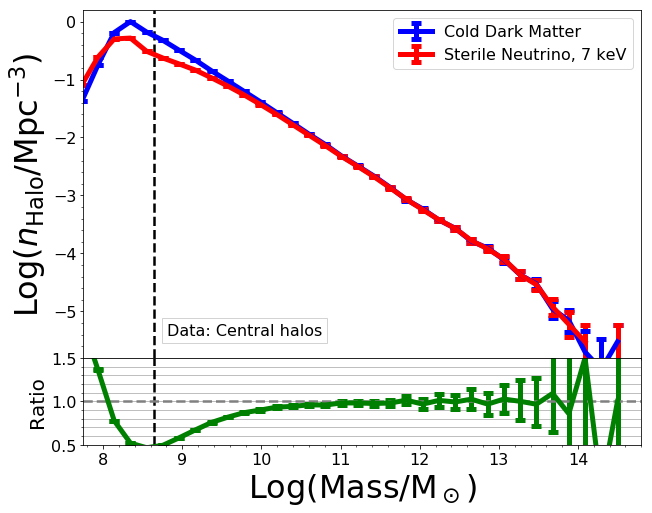

In [7]:
# line plot of histogram
# USE for report!!

volume = 100.0**3 #Mpc^3
n_cdm = N_cdm/volume
n_wdm = N_wdm/volume
m_res = np.log10(8.8*10**6*50)

textstr = 'Data: Central halos'
props = dict(facecolor='none', edgecolor='lightgrey', pad = 5.0)

plt.figure(figsize=(10,8))
grid = gridspec.GridSpec(2,1, height_ratios = [4,1])
grid.update(hspace = 0)
grid0 = plt.subplot(grid[0])
grid1 = plt.subplot(grid[1])
grid0.errorbar(np.log10(0.5*(bins[1:]+bins[:-1])), np.log10(n_cdm), yerr = [low_lim_cdm, up_lim_cdm], capsize = 5, 
               capthick = 5, label = "Cold Dark Matter",  linewidth = 5, color = "blue")
grid0.errorbar(np.log10(0.5*(bins[1:]+bins[:-1])), np.log10(n_wdm), yerr = [low_lim_wdm, up_lim_wdm], capsize = 5, 
               capthick = 5, label = "Sterile Neutrino, 7 keV",  linewidth = 5, color = "red")
grid0.axvline(x = m_res, color = "black", ls = "--", linewidth = 2.5)
#plt.title("Halo Mass Function", fontsize = 16)
grid0.set_ylabel(r"Log($n_{\rm {Halo}}$/Mpc$^{-3}$)", fontsize = 32)
grid0.legend(fontsize=16)
grid0.minorticks_on()
grid0.tick_params(labelsize=16)
grid0.set_ylim(-5.8, 0.2)
grid0.set_xlim(7.75, 14.8)
grid0.text(0.15, 0.1, textstr, transform=grid0.transAxes, fontsize=16,
        verticalalignment='top', bbox=props)

grid1.errorbar(np.log10(0.5*(bins[1:]+bins[:-1])), ratio, yerr = [low_lim_ratio, up_lim_ratio], capsize = 5, 
               capthick = 5, linewidth = 5, color = "green")
grid1.set_xlabel("Log(Mass/M$_\odot$)", fontsize = 32)
grid1.set_ylabel("Ratio", fontsize = 20)
#grid1.axvline(x = m_res, color = "black", ls = "--")
grid1.axvline(x = m_res, color = "black", ls = "--", linewidth = 2.5)
grid1.axhline(y = 1, color = "grey", ls = "--", linewidth = 2.5)
grid1.minorticks_on()
grid1.tick_params(labelsize=16)
grid1.set_ylim(0.5, 1.5)
grid1.set_xlim(7.75, 14.8)
grid1.yaxis.grid(which = "both")

plt.savefig("Images/Data1/HMF_Error.pdf")
plt.show()

### Make it bigger

C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10


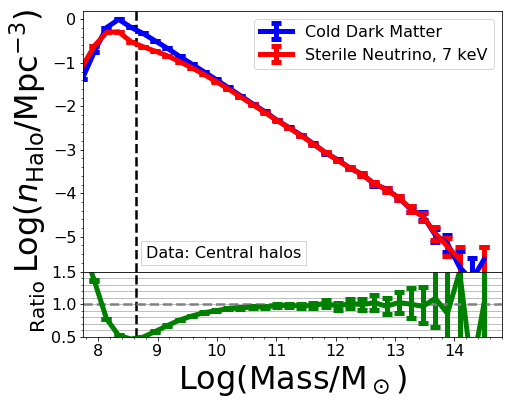

In [8]:
# line plot of histogram
# USE for report!!

volume = 100.0**3 #Mpc^3
n_cdm = N_cdm/volume
n_wdm = N_wdm/volume
m_res = np.log10(8.8*10**6*50)

textstr = 'Data: Central halos'
props = dict(facecolor='none', edgecolor='lightgrey', pad = 5.0)

plt.figure(figsize=(7.5,6))
grid = gridspec.GridSpec(2,1, height_ratios = [4,1])
grid.update(hspace = 0)
grid0 = plt.subplot(grid[0])
grid1 = plt.subplot(grid[1])
grid0.errorbar(np.log10(0.5*(bins[1:]+bins[:-1])), np.log10(n_cdm), yerr = [low_lim_cdm, up_lim_cdm], capsize = 5, 
               capthick = 5, label = "Cold Dark Matter",  linewidth = 5, color = "blue")
grid0.errorbar(np.log10(0.5*(bins[1:]+bins[:-1])), np.log10(n_wdm), yerr = [low_lim_wdm, up_lim_wdm], capsize = 5, 
               capthick = 5, label = "Sterile Neutrino, 7 keV",  linewidth = 5, color = "red")
grid0.axvline(x = m_res, color = "black", ls = "--", linewidth = 2.5)
#plt.title("Halo Mass Function", fontsize = 16)
grid0.set_ylabel(r"Log($n_{\rm {Halo}}$/Mpc$^{-3}$)", fontsize = 32)
grid0.legend(fontsize=16)
grid0.minorticks_on()
grid0.tick_params(labelsize=16)
grid0.set_ylim(-5.8, 0.2)
grid0.set_xlim(7.75, 14.8)
grid0.text(0.15, 0.1, textstr, transform=grid0.transAxes, fontsize=16,
        verticalalignment='top', bbox=props)

grid1.errorbar(np.log10(0.5*(bins[1:]+bins[:-1])), ratio, yerr = [low_lim_ratio, up_lim_ratio], capsize = 5, 
               capthick = 5, linewidth = 5, color = "green")
grid1.set_xlabel("Log(Mass/M$_\odot$)", fontsize = 32)
grid1.set_ylabel("Ratio", fontsize = 20)
#grid1.axvline(x = m_res, color = "black", ls = "--")
grid1.axvline(x = m_res, color = "black", ls = "--", linewidth = 2.5)
grid1.axhline(y = 1, color = "grey", ls = "--", linewidth = 2.5)
grid1.minorticks_on()
grid1.tick_params(labelsize=16)
grid1.set_ylim(0.5, 1.5)
grid1.set_xlim(7.75, 14.8)
grid1.yaxis.grid(which = "both")

plt.savefig("Images/Data1/HMF_Error_Big.pdf", bbox_inches = "tight")
plt.show()

# Let's try the Correlation Function on a random sample!
### First, make a random sample of size 10000

In [9]:
random.seed(6231998)

len_cdm_pos = len(cdm_position)
len_wdm_pos = len(wdm_position)

cdm_ind = random.sample(range(len_cdm_pos), 10000)
cdm_ind.sort()
cdm_sample = cdm_position[cdm_ind]

wdm_ind = random.sample(range(len_wdm_pos), 10000)
wdm_ind.sort()
wdm_sample = wdm_position[wdm_ind]

cdm_sample, wdm_sample

(array([[89.5896759 , 42.52074051, 94.6571579 ],
        [85.74271393, 41.50860977, 22.98365593],
        [42.6837616 , 39.03107071, 84.10127258],
        ...,
        [12.34729481, 16.0563488 , 92.71443939],
        [ 3.1029501 , 10.09503651, 90.90200043],
        [ 9.49395752,  8.1326952 , 88.60515594]]),
 array([[38.53261566, 27.44032669, 47.40185547],
        [53.61967087, 23.99758339, 28.47554398],
        [84.39325714, 55.46370316, 54.94112778],
        ...,
        [17.33135986, 19.03611946, 77.34182739],
        [21.320467  , 12.5075798 ,  1.12907875],
        [ 3.14744878, 24.12247849, 93.06358337]]))

### Let's see the range of distances:

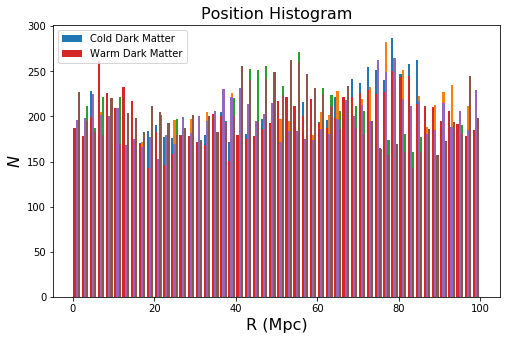

In [10]:
fig = plt.figure(figsize = (8,5))
plt.hist(cdm_sample, bins = 50, label = "Cold Dark Matter")
plt.hist(wdm_sample, bins = 50, label = "Warm Dark Matter")
plt.title("Position Histogram", fontsize = 16)
plt.ylabel(r"$N$", fontsize = 16)
plt.xlabel("R (Mpc)", fontsize = 16)
plt.legend()
plt.show()

500000-1mil galaxies corrfunc
do ratio of corrfunc in panel underneath
split by mass (10^8 - 10^10,10^10 - 10^12, 10^12+) --> sample if too many halos within each range

# Now we can calculate the correlation function
### Pick bins that are 1/10th of the entire range

In [11]:
bins = np.logspace(-0.5,1,30)

cdm_corrfunc = two_point(cdm_sample, bins, "landy-szalay")
wdm_corrfunc = two_point(wdm_sample, bins, "landy-szalay")

cdm_corrfunc, wdm_corrfunc

(array([7.5       , 2.75      , 5.42857143, 6.6       , 2.625     ,
        2.5       , 2.71428571, 3.        , 3.25      , 2.62025316,
        2.10576923, 1.95683453, 1.78365385, 1.57446809, 1.29621381,
        1.13535032, 0.94905213, 0.80513232, 0.70700986, 0.65673521,
        0.53189749, 0.41645692, 0.3549323 , 0.33710606, 0.27562797,
        0.21233614, 0.17475627, 0.13497053, 0.12318588]),
 array([3.16666667, 6.        , 7.        , 7.33333333, 2.63636364,
        5.41666667, 2.92592593, 2.72727273, 3.45      , 1.90243902,
        2.07619048, 1.77464789, 1.4185022 , 1.3447099 , 1.15690867,
        1.06701031, 0.87227074, 0.82747343, 0.6332533 , 0.52814371,
        0.48627451, 0.42165299, 0.34077108, 0.29915899, 0.21797926,
        0.16018046, 0.15758201, 0.12129339, 0.10328529]))

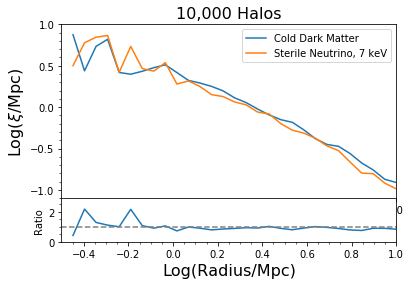

In [12]:
grid = gridspec.GridSpec(2,1, height_ratios = [4,1])
grid.update(hspace = 0)
grid0 = plt.subplot(grid[0])
grid1 = plt.subplot(grid[1])

grid0.plot(np.log10(bins[1:]), np.log10(cdm_corrfunc), label = "Cold Dark Matter")
grid0.plot(np.log10(bins[1:]), np.log10(wdm_corrfunc), label = "Sterile Neutrino, 7 keV")
grid0.set_ylabel(r"Log($\xi$/Mpc)", fontsize = 16)
grid0.legend()
grid0.minorticks_on()
grid0.set_ylim(-1.1, 1)
grid0.set_xlim(-0.5, 1)
grid0.set_title("10,000 Halos", fontsize = 16)

grid1.plot(np.log10(bins[1:]), wdm_corrfunc/cdm_corrfunc)
grid1.set_xlabel("Log(Radius/Mpc)", fontsize = 16)
grid1.set_ylabel("Ratio")
grid1.axhline(y = 1, color = "grey", ls = "--")
grid1.minorticks_on()
grid1.set_ylim(0, 2.9)
grid1.set_xlim(-0.5, 1)

plt.savefig("Images/Data1/Corrfunc.png")
plt.show()

### Now let's try a larger sample of size 300,000!

In [13]:
cdm_ind2 = random.sample(range(len_cdm_pos), 300000)
cdm_ind2.sort()
cdm_sample2 = cdm_position[cdm_ind2]

wdm_ind2 = random.sample(range(len_wdm_pos), 300000)
wdm_ind2.sort()
wdm_sample2 = wdm_position[wdm_ind2]

print(len(cdm_sample2), len(wdm_sample2))
cdm_sample2, wdm_sample2

300000 300000


(array([[76.13704681, 89.16728973, 41.91149521],
        [87.93183136, 50.49732208,  4.48562288],
        [72.69554901, 28.65808678, 26.72543335],
        ...,
        [ 2.72476721,  1.50554883, 81.46124268],
        [ 0.43687981,  5.37403774, 90.80338287],
        [ 0.42386174,  3.30170894, 82.50787354]]),
 array([[22.0139122 , 78.55089569, 49.66899109],
        [ 4.72994184, 59.55244064, 54.24892426],
        [99.71930695, 71.26818848, 35.82948303],
        ...,
        [ 4.92507124,  5.45348072, 85.57676697],
        [ 1.40654242,  5.31095886, 81.73045349],
        [ 2.57408428,  3.64787769,  2.94401264]]))

In [14]:
cdm_corrfunc_sample2 = two_point(cdm_sample2, bins, "landy-szalay")
wdm_corrfunc_sample2 = two_point(wdm_sample2, bins, "landy-szalay")

cdm_corrfunc_sample2, wdm_corrfunc_sample2

In [15]:
grid = gridspec.GridSpec(2,1, height_ratios = [4,1])
grid.update(hspace = 0)
grid0 = plt.subplot(grid[0])
grid1 = plt.subplot(grid[1])

grid0.plot(np.log10(bins[1:]), np.log10(cdm_corrfunc_sample2), label = "Cold Dark Matter")
grid0.plot(np.log10(bins[1:]), np.log10(wdm_corrfunc_sample2), label = "Sterile Neutrino, 7 keV")
grid0.set_ylabel(r"Log($\xi$/Mpc)", fontsize = 16)
grid0.legend()
grid0.minorticks_on()
grid0.set_ylim(-1.1, 0.9)
grid0.set_xlim(-0.5, 1)
grid0.set_title("300,000 Halos", fontsize = 16)

grid1.plot(np.log10(bins[1:]), wdm_corrfunc_sample2/cdm_corrfunc_sample2)
grid1.set_xlabel("Log(Radius/Mpc)", fontsize = 16)
grid1.set_ylabel("Ratio")
grid1.axhline(y = 1, color = "grey", ls = "--")
grid1.minorticks_on()
grid1.set_ylim(.9, 1.1)
grid1.set_xlim(-0.5, 1)

plt.savefig("Images/Data1/Corrfunc_Large.png")
plt.show()

# Next, compute the correlation function for all galaxies
### First, we need to split them by mass

In [16]:
# CDM Mass
cdm_mass1_ind = np.where(np.array(cdm_mass) < 10**10)
cdm_mass3_ind = np.where(np.array(cdm_mass) > 10**12)

len_cdm_mass = len(cdm_mass)
cdm_mass2_ind = np.setdiff1d(range(len(cdm_mass)), np.append(cdm_mass1_ind, cdm_mass3_ind))

cdm_mass1 = np.array(cdm_mass)[cdm_mass1_ind]
cdm_mass2 = np.array(cdm_mass)[cdm_mass2_ind]
cdm_mass3 = np.array(cdm_mass)[cdm_mass3_ind]

# WDM Mass
wdm_mass1_ind = np.where(np.array(wdm_mass) < 10**10)
wdm_mass3_ind = np.where(np.array(wdm_mass) > 10**12)

len_wdm_mass = len(wdm_mass)
wdm_mass2_ind = np.setdiff1d(range(len(wdm_mass)), np.append(wdm_mass1_ind, wdm_mass3_ind))

wdm_mass1 = np.array(wdm_mass)[wdm_mass1_ind]
wdm_mass2 = np.array(wdm_mass)[wdm_mass2_ind]
wdm_mass3 = np.array(wdm_mass)[wdm_mass3_ind]

print(cdm_mass1, cdm_mass2, cdm_mass3)
print(wdm_mass1, wdm_mass2, wdm_mass3)

print(len(cdm_mass1), len(cdm_mass2), len(cdm_mass3))
print(len(wdm_mass1), len(wdm_mass2), len(wdm_mass3))

[8.97657344e+09 7.80609894e+09 2.93058714e+09 ... 1.67210672e+08
 1.05606736e+08 1.49609552e+08] [9.67586546e+11 6.59012452e+11 7.91760142e+11 ... 1.01206456e+10
 1.00414413e+10 1.00326400e+10] [1.62182445e+14 2.89476434e+14 2.65510885e+14 ... 1.00884362e+12
 1.00204957e+12 1.00113436e+12]
[5.18353101e+09 5.72036557e+09 2.29694643e+09 ... 1.05606736e+08
 1.58410112e+08 1.58410112e+08] [9.66099337e+11 6.51329602e+11 7.72337369e+11 ... 1.00238397e+10
 1.00326400e+10 1.00678431e+10] [1.46641357e+14 2.85280284e+14 2.59727578e+14 ... 1.04785648e+12
 1.00360729e+12 1.01783778e+12]
3854511 89628 1445
2477183 84534 1430


### Reduce the larger datasets to a more manageable size

In [17]:
cdm_mass1_ind = random.sample(range(len(cdm_mass1)), 300000)
cdm_mass1_ind.sort()
cdm_mass1_sample = cdm_mass1[cdm_mass1_ind]

wdm_mass1_ind = random.sample(range(len(wdm_mass1)), 300000)
wdm_mass1_ind.sort()
wdm_mass1_sample = wdm_mass1[wdm_mass1_ind]

cdm_mass1_sample, wdm_mass1_sample

(array([5.19233126e+09, 1.16167411e+09, 4.57629235e+09, ...,
        1.58410112e+08, 8.80056160e+07, 1.49609552e+08]),
 array([8.24612659e+09, 6.78523341e+09, 8.51014246e+09, ...,
        4.40028080e+07, 1.05606736e+08, 1.58410112e+08]))

### And get their corresponding positions

In [18]:
cdm_pos1 = np.array(cdm_position)[cdm_mass1_ind]
cdm_pos2 = np.array(cdm_position)[cdm_mass2_ind]
cdm_pos3 = np.array(cdm_position)[cdm_mass3_ind]

wdm_pos1 = np.array(wdm_position)[wdm_mass1_ind]
wdm_pos2 = np.array(wdm_position)[wdm_mass2_ind]
wdm_pos3 = np.array(wdm_position)[wdm_mass3_ind]

### Now we can compute their respective correlation functions

In [19]:
# CDM Correlation Function
cdm_corrfunc1 = two_point(cdm_pos1, bins, "landy-szalay")
cdm_corrfunc2 = two_point(cdm_pos2, bins, "landy-szalay")
cdm_corrfunc3 = two_point(cdm_pos3, bins, "landy-szalay")

# WDM Correlation Function
wdm_corrfunc1 = two_point(wdm_pos1, bins, "landy-szalay")
wdm_corrfunc2 = two_point(wdm_pos2, bins, "landy-szalay")
wdm_corrfunc3 = two_point(wdm_pos3, bins, "landy-szalay")

print(cdm_corrfunc1, cdm_corrfunc2, cdm_corrfunc3)
print(wdm_corrfunc1, wdm_corrfunc2, wdm_corrfunc3)

### And graph them!

In [20]:
grid = gridspec.GridSpec(2,3, height_ratios = [4,1])
grid.update(hspace = 0, wspace = 0)
plt.figure(figsize=(10,5))
    
grid0 = plt.subplot(grid[0])
grid1 = plt.subplot(grid[1])
grid2 = plt.subplot(grid[2])
grid3 = plt.subplot(grid[3])
grid4 = plt.subplot(grid[4])
grid5 = plt.subplot(grid[5])

grid0.plot(np.log10(bins[1:]), np.log10(cdm_corrfunc1), label = "Cold Dark Matter")
grid0.plot(np.log10(bins[1:]), np.log10(wdm_corrfunc1), label = "Sterile Neutrino, 7 keV")
grid0.set_ylabel(r"Log($\xi$/Mpc)", fontsize = 16)
grid0.set_title(r"< 10$^{10}$ $M_\odot$", fontsize = 16)
grid0.legend()

grid1.plot(np.log10(bins[1:]), np.log10(cdm_corrfunc2))
grid1.plot(np.log10(bins[1:]), np.log10(wdm_corrfunc2))
grid1.set_title(r"10$^{10}$ - 10$^{12}$ $M_\odot$", fontsize = 16)

grid2.plot(np.log10(bins[1:]), np.log10(cdm_corrfunc3))
grid2.plot(np.log10(bins[1:]), np.log10(wdm_corrfunc3))
grid2.set_title(r"> 10$^{12}$ $M_\odot$", fontsize = 16)

grid3.plot(np.log10(bins[1:]), wdm_corrfunc1/cdm_corrfunc1)
grid3.set_ylabel("Ratio")

grid4.plot(np.log10(bins[1:]), wdm_corrfunc2/cdm_corrfunc2)
grid4.set_xlabel("Log(Radius/Mpc)", fontsize = 16)

grid5.plot(np.log10(bins[1:]), wdm_corrfunc3/cdm_corrfunc3)

for i in range(6):
    plt.subplot(grid[i]).minorticks_on()
    plt.subplot(grid[i]).set_xlim(-0.6, 1.1)
    plt.subplot(grid[i]).set_ylim(-1, 1.1)

for i in range(3,6):
    plt.subplot(grid[i]).set_ylim(0.8, 1.15)
    plt.subplot(grid[i]).axhline(y = 1, color = "grey", ls = "--")
    
for i in range(1,3):
    plt.subplot(grid[i]).set_xticklabels([])
    plt.subplot(grid[i]).set_yticklabels([]) 
    plt.subplot(grid[i]).set_xticks([])
    plt.subplot(grid[i]).set_yticks([])
    
for i in range(4,6):
    plt.subplot(grid[i]).set_yticklabels([])
    plt.subplot(grid[i]).set_yticks([])
    
plt.savefig("Images/Data1/Corrfunc_Mass.png")
plt.show()

# Now let's do it in Odyssey
### First, we need to split them by mass

In [21]:
# CDM Mass
cdm_mass1_ind = np.where((cdm_mass > 10**8.6) &(cdm_mass < 10**10))
cdm_mass2_ind = np.where((cdm_mass > 10**10) & (cdm_mass < 10**12))
cdm_mass3_ind = np.where(cdm_mass > 10**12)

cdm_mass1 = np.array(cdm_mass)[cdm_mass1_ind]
cdm_mass2 = np.array(cdm_mass)[cdm_mass2_ind]
cdm_mass3 = np.array(cdm_mass)[cdm_mass3_ind]

# WDM Mass
wdm_mass1_ind = np.where((wdm_mass > 10**8.6) &(wdm_mass < 10**10))
wdm_mass2_ind = np.where((wdm_mass > 10**10) & (wdm_mass < 10**12))
wdm_mass3_ind = np.where(wdm_mass > 10**12)

wdm_mass1 = np.array(wdm_mass)[wdm_mass1_ind]
wdm_mass2 = np.array(wdm_mass)[wdm_mass2_ind]
wdm_mass3 = np.array(wdm_mass)[wdm_mass3_ind]

print(cdm_mass1, cdm_mass2, cdm_mass3)
print(wdm_mass1, wdm_mass2, wdm_mass3)

print(len(cdm_mass1), len(cdm_mass2), len(cdm_mass3))
print(len(wdm_mass1), len(wdm_mass2), len(wdm_mass3))

[8.97657344e+09 7.80609894e+09 2.93058714e+09 ... 4.04825856e+08
 4.04825856e+08 4.04825856e+08] [9.67586546e+11 6.59012452e+11 7.91760142e+11 ... 1.01206456e+10
 1.00414413e+10 1.00326400e+10] [1.62182445e+14 2.89476434e+14 2.65510885e+14 ... 1.00884362e+12
 1.00204957e+12 1.00113436e+12]
[5.18353101e+09 5.72036557e+09 2.29694643e+09 ... 4.04825856e+08
 4.04825856e+08 4.13626400e+08] [9.66099337e+11 6.51329602e+11 7.72337369e+11 ... 1.00238397e+10
 1.00326400e+10 1.00678431e+10] [1.46641357e+14 2.85280284e+14 2.59727578e+14 ... 1.04785648e+12
 1.00360729e+12 1.01783778e+12]
1438880 89628 1445
876852 84534 1430


In [22]:
# low mass group
cdm_mass1_ind = random.sample(range(len(cdm_mass1)), 870000)
cdm_mass1_sample = cdm_mass1[cdm_mass1_ind]

wdm_mass1_ind = random.sample(range(len(wdm_mass1)), 870000)
wdm_mass1_sample = wdm_mass1[wdm_mass1_ind]

# mid mass group
cdm_mass2_ind = random.sample(range(len(cdm_mass2)), 84000)
cdm_mass2_sample = cdm_mass2[cdm_mass2_ind]

wdm_mass2_ind = random.sample(range(len(wdm_mass2)), 84000)
wdm_mass2_sample = wdm_mass2[wdm_mass2_ind]

# high mass group
cdm_mass3_ind = random.sample(range(len(cdm_mass3)), 1430)
cdm_mass3_sample = cdm_mass3[cdm_mass3_ind]

wdm_mass3_ind = random.sample(range(len(wdm_mass3)), 1430)
wdm_mass3_sample = wdm_mass3[wdm_mass3_ind]

cdm_mass1_sample, wdm_mass1_sample, cdm_mass2_sample, wdm_mass2_sample, cdm_mass3_sample, wdm_mass3_sample

(array([4.48828640e+08, 8.36053376e+08, 8.80056192e+08, ...,
        4.92831456e+08, 1.10887078e+09, 6.07238784e+08]),
 array([4.13626400e+08, 1.45209267e+09, 5.87877530e+09, ...,
        6.33640448e+08, 1.23207859e+09, 4.75230336e+08]),
 array([1.25319997e+10, 2.05581128e+10, 1.13879276e+10, ...,
        1.21359749e+10, 5.45986847e+10, 4.05617869e+10]),
 array([4.26651238e+10, 2.40167342e+10, 1.58410107e+10, ...,
        1.15639378e+10, 2.00036782e+10, 1.26816102e+10]),
 array([1.54683965e+12, 2.91809028e+12, 1.16066209e+12, ...,
        1.92622297e+12, 1.74895333e+12, 4.80200045e+12]),
 array([1.63179135e+12, 1.41686407e+12, 1.52396694e+12, ...,
        2.85935534e+12, 5.67996213e+12, 2.05406863e+12]))

In [23]:
cdm_pos1 = np.array(cdm_position)[cdm_mass1_ind]
cdm_pos2 = np.array(cdm_position)[cdm_mass2_ind]
cdm_pos3 = np.array(cdm_position)[cdm_mass3_ind]

wdm_pos1 = np.array(wdm_position)[wdm_mass1_ind]
wdm_pos2 = np.array(wdm_position)[wdm_mass2_ind]
wdm_pos3 = np.array(wdm_position)[wdm_mass3_ind]

In [24]:
# np.savetxt("cdm_pos_low_mass.txt", cdm_pos1, fmt = "%f %f %f")
# np.savetxt("wdm_pos_low_mass.txt", wdm_pos1, fmt = "%f %f %f")

# np.savetxt("cdm_pos_mid_mass.txt", cdm_pos2, fmt = "%f %f %f")
# np.savetxt("wdm_pos_mid_mass.txt", wdm_pos2, fmt = "%f %f %f")

# np.savetxt("cdm_pos_high_mass.txt", cdm_pos3, fmt = "%f %f %f")
# np.savetxt("wdm_pos_high_mass.txt", wdm_pos3, fmt = "%f %f %f")

In [25]:
CUTE_cdm_low = np.genfromtxt("corr_cdm_low_mass.txt", usecols = (0,1))
CUTE_wdm_low = np.genfromtxt("corr_wdm_low_mass.txt", usecols = (0,1))

CUTE_cdm_mid = np.genfromtxt("corr_cdm_mid_mass.txt", usecols = (0,1))
CUTE_wdm_mid = np.genfromtxt("corr_wdm_mid_mass.txt", usecols = (0,1))

CUTE_cdm_high = np.genfromtxt("corr_cdm_high_mass.txt", usecols = (0,1))
CUTE_wdm_high = np.genfromtxt("corr_wdm_high_mass.txt", usecols = (0,1))

In [26]:
CUTE_cdm_low_old = CUTE_cdm_low
CUTE_wdm_low_old = CUTE_wdm_low

In [27]:
# np.savetxt("corr_cdm_low_mass_old.txt", CUTE_cdm_low_old, fmt = "%f %f")
# np.savetxt("corr_wdm_low_mass_old.txt", CUTE_wdm_low_old, fmt = "%f %f")

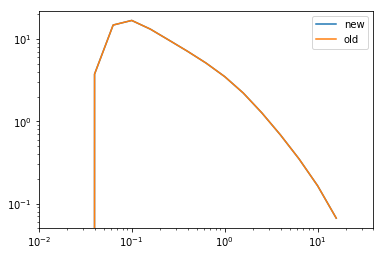

In [28]:
CUTE_cdm_low = np.genfromtxt("corr_cdm_low_mass.txt", usecols = (0,1))
plt.loglog(CUTE_cdm_low[:,0], CUTE_cdm_low[:,1], label = 'new')
plt.loglog(CUTE_cdm_low_old[:,0], CUTE_cdm_low_old[:,1], label = 'old')
plt.xlim(1e-2, 4e1)
plt.legend()
plt.show()

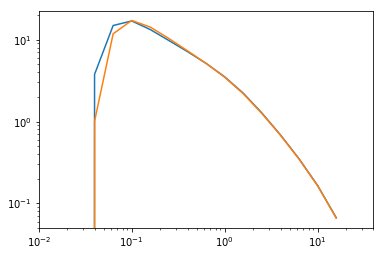

In [29]:
plt.loglog(CUTE_cdm_low[:,0], CUTE_cdm_low[:,1])
plt.loglog(CUTE_wdm_low[:,0], CUTE_wdm_low[:,1])
plt.xlim(1e-2, 4e1)
plt.show()

C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide
C:\Users\shife\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


<Figure size 576x576 with 0 Axes>

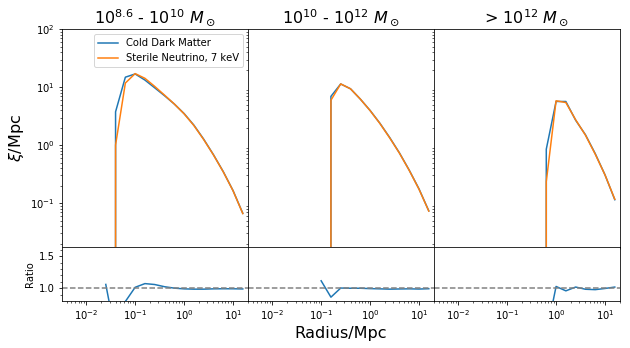

In [30]:
plt.figure(figsize=(8,8))
grid = gridspec.GridSpec(2,3, height_ratios = [4,1])
grid.update(hspace = 0, wspace = 0)
plt.figure(figsize=(10,5))
    
grid0 = plt.subplot(grid[0])
grid1 = plt.subplot(grid[1])
grid2 = plt.subplot(grid[2])
grid3 = plt.subplot(grid[3])
grid4 = plt.subplot(grid[4])
grid5 = plt.subplot(grid[5])

grid0.loglog(CUTE_cdm_low[:,0], CUTE_cdm_low[:,1], label = "Cold Dark Matter")
grid0.loglog(CUTE_wdm_low[:,0], CUTE_wdm_low[:,1], label = "Sterile Neutrino, 7 keV")
grid0.set_ylabel(r"$\xi$/Mpc", fontsize = 16)
grid0.set_title(r"10$^{8.6}$ - 10$^{10}$ $M_\odot$", fontsize = 16)
grid0.legend()

grid1.loglog(CUTE_cdm_mid[:,0], CUTE_cdm_mid[:,1])
grid1.loglog(CUTE_wdm_mid[:,0], CUTE_wdm_mid[:,1])
grid1.set_title(r"10$^{10}$ - 10$^{12}$ $M_\odot$", fontsize = 16)

grid2.loglog(CUTE_cdm_high[:,0], CUTE_cdm_high[:,1])
grid2.loglog(CUTE_wdm_high[:,0], CUTE_wdm_high[:,1])
grid2.set_title(r"> 10$^{12}$ $M_\odot$", fontsize = 16)

grid3.semilogx(CUTE_wdm_low[:,0], CUTE_wdm_low[:,1]/CUTE_cdm_low[:,1])
grid3.set_ylabel("Ratio")

grid4.semilogx(CUTE_wdm_mid[:,0], CUTE_wdm_mid[:,1]/CUTE_cdm_mid[:,1])
grid4.set_xlabel("Radius/Mpc", fontsize = 16)

grid5.semilogx(CUTE_wdm_high[:,0], CUTE_wdm_high[:,1]/CUTE_cdm_high[:,1])

for i in range(6):
    plt.subplot(grid[i]).minorticks_on()
    plt.subplot(grid[i]).set_xlim(10**-2.5, 2e1)
    plt.subplot(grid[i]).set_ylim(10**-1.75, 10**2)

for i in range(3,6):
    plt.subplot(grid[i]).set_ylim(0.8, 1.65)
    plt.subplot(grid[i]).axhline(y = 1, color = "grey", ls = "--")
    
for i in range(1,3):
    plt.subplot(grid[i]).set_xticklabels([])
    plt.subplot(grid[i]).set_yticklabels([]) 
    plt.subplot(grid[i]).set_xticks([])
    plt.subplot(grid[i]).set_yticks([])
    
for i in range(4,6):
    plt.subplot(grid[i]).set_yticklabels([])
    plt.subplot(grid[i]).set_yticks([])
    
plt.savefig("Images/Data1/Corrfunc_Mass_Odyssey.png")
plt.show()

# Let's calculate the correlation function at fixed number density!
### First, 1,000,000 halos

In [31]:
cdm_mass_ind = sorted(range(len(cdm_mass)), key=lambda k: cdm_mass[k], reverse = True)
wdm_mass_ind = sorted(range(len(wdm_mass)), key=lambda k: wdm_mass[k], reverse = True)

cdm_mass[cdm_mass_ind], wdm_mass[wdm_mass_ind], cdm_mass[cdm_mass_ind[:1000000]], wdm_mass[wdm_mass_ind[:1000000]]

(array([2.89476434e+14, 2.71348333e+14, 2.65510885e+14, ...,
        4.40028080e+07, 4.40028080e+07, 4.40028080e+07]),
 array([2.85280284e+14, 2.69721044e+14, 2.59727578e+14, ...,
        4.40028080e+07, 4.40028080e+07, 4.40028080e+07]),
 array([2.89476434e+14, 2.71348333e+14, 2.65510885e+14, ...,
        6.60042112e+08, 6.60042112e+08, 6.60042112e+08]),
 array([2.85280284e+14, 2.69721044e+14, 2.59727578e+14, ...,
        3.78424128e+08, 3.78424128e+08, 3.78424128e+08]))

In [32]:
np.savetxt("cdm_pos_sorted_centrals.txt", cdm_position[cdm_mass_ind[:1000000]], fmt = "%f %f %f")
np.savetxt("wdm_pos_sorted_centrals.txt", wdm_position[wdm_mass_ind[:1000000]], fmt = "%f %f %f")

cdm_position[cdm_mass_ind[:1000000]], wdm_position[wdm_mass_ind[:1000000]]

(array([[ 5.65795279, 75.58935547, 47.56488037],
        [52.49924088,  4.96875715, 20.1123848 ],
        [ 9.07952595, 35.07923126, 54.54546738],
        ...,
        [25.71445465, 97.51879883, 74.57725525],
        [48.97930908,  3.84777069, 74.90293884],
        [34.01684952, 15.82272625, 58.44670105]]),
 array([[ 5.73223782, 75.64173889, 47.56919861],
        [52.50284958,  4.96340752, 20.1236515 ],
        [ 9.07071495, 35.11302948, 54.56376266],
        ...,
        [27.69865036, 35.90272141, 87.57738495],
        [26.23893166, 34.34856415, 82.29943848],
        [34.0650177 , 37.91765976, 83.23416138]]))

C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


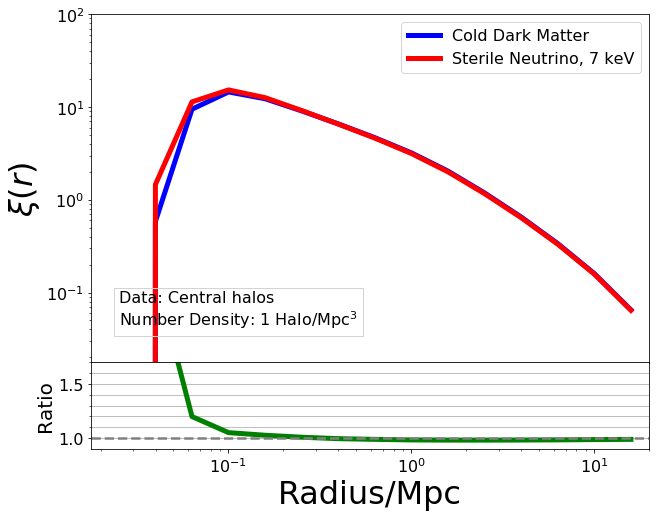

In [33]:
CUTE_cdm_sorted = np.genfromtxt("Output/corr_cdm_pos_sorted_centrals.txt", usecols = (0,1))
CUTE_wdm_sorted = np.genfromtxt("corr_wdm_pos_sorted_centrals.txt", usecols = (0,1))

textstr = '\n'.join((
    r'Data: Central halos',
    r'Number Density: 1 Halo/Mpc$^{3}$'))
props = dict(facecolor='none', edgecolor='lightgrey', pad = 5.0)

plt.figure(figsize=(10,8))
grid = gridspec.GridSpec(2,1, height_ratios = [4,1])
grid.update(hspace = 0)
grid0 = plt.subplot(grid[0])
grid1 = plt.subplot(grid[1])

grid0.loglog(CUTE_cdm_sorted[:,0], CUTE_cdm_sorted[:,1], label = "Cold Dark Matter", linewidth = 5, color = "blue")
grid0.loglog(CUTE_wdm_sorted[:,0], CUTE_wdm_sorted[:,1], label = "Sterile Neutrino, 7 keV", linewidth = 5, color = "red")
grid0.set_xlim(10**-1.75, 2e1)
grid0.set_ylim(10**-1.75, 10**2)
grid0.set_ylabel(r"$\xi(r)$", fontsize = 32)
grid0.legend(fontsize = 16)
grid0.minorticks_on()
grid0.tick_params(labelsize=16)
# grid0.set_title("1 Halo/Mpc$^{3}$", fontsize = 16)
grid0.text(0.05, 0.2, textstr, transform=grid0.transAxes, fontsize=16,
        verticalalignment='top', bbox=props)

grid1.semilogx(CUTE_wdm_sorted[:,0], CUTE_wdm_sorted[:,1]/CUTE_cdm_sorted[:,1], linewidth = 5, color = "green")
grid1.set_xlabel("Radius/Mpc", fontsize = 32)
grid1.set_ylabel("Ratio", fontsize=20)
grid1.axhline(y = 1, color = "grey", ls = "--", linewidth = 2.5)
grid1.set_xlim(10**-1.75, 2e1)
grid1.set_ylim(0.9, 1.7)
grid1.minorticks_on()
grid1.tick_params(labelsize=16)
grid1.yaxis.grid(which = "both")

plt.savefig("Images/Data1/Corrfunc_Largest_Sorted_Centrals.pdf")
plt.savefig("Images/Data1/Corrfunc_Largest_Sorted_Centrals.png")
plt.show()

### Next, 100,000 halos!

In [34]:
np.savetxt("cdm_pos_sorted_centrals2.txt", cdm_position[cdm_mass_ind[:100000]], fmt = "%f %f %f")
np.savetxt("wdm_pos_sorted_centrals2.txt", wdm_position[wdm_mass_ind[:100000]], fmt = "%f %f %f")

cdm_position[cdm_mass_ind[:100000]], wdm_position[wdm_mass_ind[:100000]]

(array([[ 5.65795279, 75.58935547, 47.56488037],
        [52.49924088,  4.96875715, 20.1123848 ],
        [ 9.07952595, 35.07923126, 54.54546738],
        ...,
        [78.00460815, 76.61449432, 83.97402954],
        [ 2.00843716, 86.81043243, 64.98413086],
        [98.23886108, 99.2871933 , 30.27627945]]),
 array([[ 5.73223782, 75.64173889, 47.56919861],
        [52.50284958,  4.96340752, 20.1236515 ],
        [ 9.07071495, 35.11302948, 54.56376266],
        ...,
        [60.14265442, 83.76862335,  2.92299294],
        [36.25125122, 22.50661087, 49.00571823],
        [87.20575714, 43.95806885, 32.58330536]]))

C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


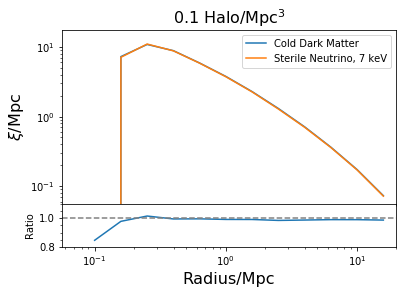

In [35]:
CUTE_cdm_sorted = np.genfromtxt("corr_cdm_pos_sorted_centrals2.txt", usecols = (0,1))
CUTE_wdm_sorted = np.genfromtxt("corr_wdm_pos_sorted_centrals2.txt", usecols = (0,1))

grid = gridspec.GridSpec(2,1, height_ratios = [4,1])
grid.update(hspace = 0)
grid0 = plt.subplot(grid[0])
grid1 = plt.subplot(grid[1])

grid0.loglog(CUTE_cdm_sorted[:,0], CUTE_cdm_sorted[:,1], label = "Cold Dark Matter")
grid0.loglog(CUTE_wdm_sorted[:,0], CUTE_wdm_sorted[:,1], label = "Sterile Neutrino, 7 keV")
grid0.set_xlim(10**-1.25, 2e1)
grid0.set_ylim(10**-1.25, 10**1.25)
grid0.set_ylabel(r"$\xi$/Mpc", fontsize = 16)
grid0.legend()
grid0.minorticks_on()
grid0.set_title("0.1 Halo/Mpc$^{3}$", fontsize = 16)

grid1.semilogx(CUTE_wdm_sorted[:,0], CUTE_wdm_sorted[:,1]/CUTE_cdm_sorted[:,1])
grid1.set_xlabel("Radius/Mpc", fontsize = 16)
grid1.set_ylabel("Ratio")
grid1.axhline(y = 1, color = "grey", ls = "--")
grid1.set_xlim(10**-1.25, 2e1)
grid1.set_ylim(0.8, 1.1)
grid1.minorticks_on()

plt.savefig("Images/Data1/Corrfunc_Largest_Sorted_Centrals2.png")
plt.show()

### And lastly, 1,000 halos

In [36]:
np.savetxt("cdm_pos_sorted_centrals3.txt", cdm_position[cdm_mass_ind[:1000]], fmt = "%f %f %f")
np.savetxt("wdm_pos_sorted_centrals3.txt", wdm_position[wdm_mass_ind[:1000]], fmt = "%f %f %f")

cdm_position[cdm_mass_ind[:1000]], wdm_position[wdm_mass_ind[:1000]]

(array([[ 5.65795279, 75.58935547, 47.56488037],
        [52.49924088,  4.96875715, 20.1123848 ],
        [ 9.07952595, 35.07923126, 54.54546738],
        ...,
        [74.56152344, 33.61525726, 27.71046829],
        [51.60377121, 28.99856758, 11.95265102],
        [92.21416473, 54.02315903, 68.22387695]]),
 array([[ 5.73223782, 75.64173889, 47.56919861],
        [52.50284958,  4.96340752, 20.1236515 ],
        [ 9.07071495, 35.11302948, 54.56376266],
        ...,
        [40.8763504 , 31.09578133, 72.24028015],
        [54.42911911, 45.07494354, 33.09229279],
        [38.4822464 , 83.15719604, 99.47509003]]))

C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


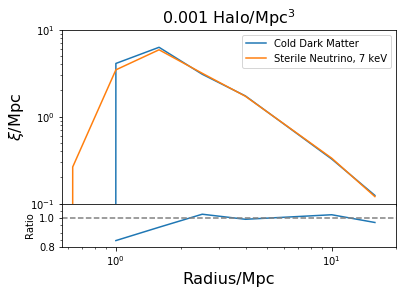

In [37]:
CUTE_cdm_sorted = np.genfromtxt("corr_cdm_pos_sorted_centrals3.txt", usecols = (0,1))
CUTE_wdm_sorted = np.genfromtxt("corr_wdm_pos_sorted_centrals3.txt", usecols = (0,1))

grid = gridspec.GridSpec(2,1, height_ratios = [4,1])
grid.update(hspace = 0)
grid0 = plt.subplot(grid[0])
grid1 = plt.subplot(grid[1])

grid0.loglog(CUTE_cdm_sorted[:,0], CUTE_cdm_sorted[:,1], label = "Cold Dark Matter")
grid0.loglog(CUTE_wdm_sorted[:,0], CUTE_wdm_sorted[:,1], label = "Sterile Neutrino, 7 keV")
grid0.set_xlim(10**-0.25, 2e1)
grid0.set_ylim(10**-1, 10**1)
grid0.set_ylabel(r"$\xi$/Mpc", fontsize = 16)
grid0.legend()
grid0.minorticks_on()
grid0.set_title("0.001 Halo/Mpc$^{3}$", fontsize = 16)

grid1.semilogx(CUTE_wdm_sorted[:,0], CUTE_wdm_sorted[:,1]/CUTE_cdm_sorted[:,1])
grid1.set_xlabel("Radius/Mpc", fontsize = 16)
grid1.set_ylabel("Ratio")
grid1.axhline(y = 1, color = "grey", ls = "--")
grid1.set_xlim(10**-0.25, 2e1)
grid1.set_ylim(0.8, 1.1)
grid1.minorticks_on()

plt.savefig("Images/Data1/Corrfunc_Largest_Sorted_Centrals3.png")
plt.show()

# Split Mass at Fixed Number Density!

In [38]:
# CDM Mass
cdm_mass1_ind = np.where((cdm_mass > 10**8.6) &(cdm_mass < 10**10))
cdm_mass2_ind = np.where((cdm_mass > 10**10) & (cdm_mass < 10**12))
cdm_mass3_ind = np.where(cdm_mass > 10**12)

cdm_mass1 = np.array(cdm_mass)[cdm_mass1_ind]
cdm_mass2 = np.array(cdm_mass)[cdm_mass2_ind]
cdm_mass3 = np.array(cdm_mass)[cdm_mass3_ind]

# WDM Mass
wdm_mass1_ind = np.where((wdm_mass > 10**8.6) &(wdm_mass < 10**10))
wdm_mass2_ind = np.where((wdm_mass > 10**10) & (wdm_mass < 10**12))
wdm_mass3_ind = np.where(wdm_mass > 10**12)

wdm_mass1 = np.array(wdm_mass)[wdm_mass1_ind]
wdm_mass2 = np.array(wdm_mass)[wdm_mass2_ind]
wdm_mass3 = np.array(wdm_mass)[wdm_mass3_ind]

print(cdm_mass1, cdm_mass2, cdm_mass3)
print(wdm_mass1, wdm_mass2, wdm_mass3)

print(len(cdm_mass1), len(cdm_mass2), len(cdm_mass3))
print(len(wdm_mass1), len(wdm_mass2), len(wdm_mass3))

[8.97657344e+09 7.80609894e+09 2.93058714e+09 ... 4.04825856e+08
 4.04825856e+08 4.04825856e+08] [9.67586546e+11 6.59012452e+11 7.91760142e+11 ... 1.01206456e+10
 1.00414413e+10 1.00326400e+10] [1.62182445e+14 2.89476434e+14 2.65510885e+14 ... 1.00884362e+12
 1.00204957e+12 1.00113436e+12]
[5.18353101e+09 5.72036557e+09 2.29694643e+09 ... 4.04825856e+08
 4.04825856e+08 4.13626400e+08] [9.66099337e+11 6.51329602e+11 7.72337369e+11 ... 1.00238397e+10
 1.00326400e+10 1.00678431e+10] [1.46641357e+14 2.85280284e+14 2.59727578e+14 ... 1.04785648e+12
 1.00360729e+12 1.01783778e+12]
1438880 89628 1445
876852 84534 1430


In [39]:
# low mass group
cdm_mass1_ind = sorted(range(len(cdm_mass1)), key=lambda k: cdm_mass1[k], reverse = True)
cdm_mass1_sample = cdm_mass1[cdm_mass1_ind[:870000]]

wdm_mass1_ind = sorted(range(len(wdm_mass1)), key=lambda k: wdm_mass1[k], reverse = True)
wdm_mass1_sample = wdm_mass1[wdm_mass1_ind[:870000]]

# mid mass group
cdm_mass2_ind = sorted(range(len(cdm_mass2)), key=lambda k: cdm_mass2[k], reverse = True)
cdm_mass2_sample = cdm_mass2[cdm_mass2_ind[:84000]]

wdm_mass2_ind = sorted(range(len(wdm_mass2)), key=lambda k: wdm_mass2[k], reverse = True)
wdm_mass2_sample = wdm_mass2[wdm_mass2_ind[:84000]]

# high mass group
cdm_mass3_ind = sorted(range(len(cdm_mass3)), key=lambda k: cdm_mass3[k], reverse = True)
cdm_mass3_sample = cdm_mass3[cdm_mass3_ind[:1430]]

wdm_mass3_ind = sorted(range(len(wdm_mass3)), key=lambda k: wdm_mass3[k], reverse = True)
wdm_mass3_sample = wdm_mass3[wdm_mass3_ind[:1430]]

cdm_mass1_sample, wdm_mass1_sample, cdm_mass2_sample, wdm_mass2_sample, cdm_mass3_sample, wdm_mass3_sample

(array([9.99743898e+09, 9.99743898e+09, 9.99743898e+09, ...,
        6.95244352e+08, 6.95244352e+08, 6.95244352e+08]),
 array([9.99743795e+09, 9.99743795e+09, 9.99743795e+09, ...,
        4.04825856e+08, 4.04825856e+08, 4.04825856e+08]),
 array([9.99849460e+11, 9.99682146e+11, 9.99400669e+11, ...,
        1.07454863e+10, 1.07454863e+10, 1.07454863e+10]),
 array([9.99620608e+11, 9.99092519e+11, 9.98758220e+11, ...,
        1.00766433e+10, 1.00766433e+10, 1.00766433e+10]),
 array([2.89476434e+14, 2.71348333e+14, 2.65510885e+14, ...,
        1.00948600e+12, 1.00884362e+12, 1.00860592e+12]),
 array([2.85280284e+14, 2.69721044e+14, 2.59727578e+14, ...,
        1.00176803e+12, 1.00104641e+12, 1.00101109e+12]))

In [40]:
cdm_pos1 = np.array(cdm_position)[cdm_mass1_ind]
cdm_pos2 = np.array(cdm_position)[cdm_mass2_ind]
cdm_pos3 = np.array(cdm_position)[cdm_mass3_ind]

wdm_pos1 = np.array(wdm_position)[wdm_mass1_ind]
wdm_pos2 = np.array(wdm_position)[wdm_mass2_ind]
wdm_pos3 = np.array(wdm_position)[wdm_mass3_ind]

In [41]:
np.savetxt("cdm_pos_low_mass_sorted_centrals.txt", cdm_pos1, fmt = "%f %f %f")
np.savetxt("wdm_pos_low_mass_sorted_centrals.txt", wdm_pos1, fmt = "%f %f %f")

np.savetxt("cdm_pos_mid_mass_sorted_centrals.txt", cdm_pos2, fmt = "%f %f %f")
np.savetxt("wdm_pos_mid_mass_sorted_centrals.txt", wdm_pos2, fmt = "%f %f %f")

np.savetxt("cdm_pos_high_mass_sorted_centrals.txt", cdm_pos3, fmt = "%f %f %f")
np.savetxt("wdm_pos_high_mass_sorted_centrals.txt", wdm_pos3, fmt = "%f %f %f")

In [42]:
CUTE_cdm_low = np.genfromtxt("Output/corr_cdm_low_mass_sorted_centrals.txt", usecols = (0,1))
CUTE_wdm_low = np.genfromtxt("Output/corr_wdm_low_mass_sorted_centrals.txt", usecols = (0,1))

CUTE_cdm_mid = np.genfromtxt("Output/corr_cdm_mid_mass_sorted_centrals.txt", usecols = (0,1))
CUTE_wdm_mid = np.genfromtxt("Output/corr_wdm_mid_mass_sorted_centrals.txt", usecols = (0,1))

CUTE_cdm_high = np.genfromtxt("Output/corr_cdm_high_mass_sorted_centrals.txt", usecols = (0,1))
CUTE_wdm_high = np.genfromtxt("Output/corr_wdm_high_mass_sorted_centrals.txt", usecols = (0,1))

C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide
C:\Users\shife\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


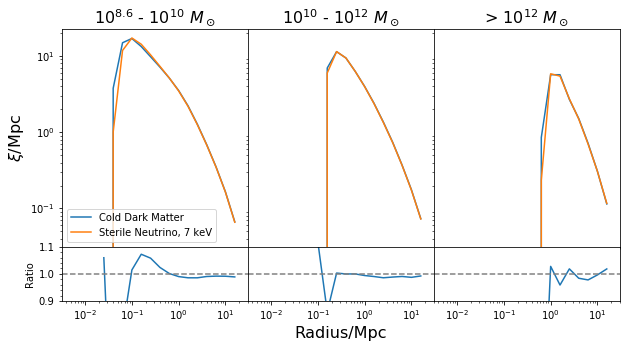

In [51]:
grid = gridspec.GridSpec(2,3, height_ratios = [4,1])
grid.update(hspace = 0, wspace = 0)
plt.figure(figsize=(10,5))
    
grid0 = plt.subplot(grid[0])
grid1 = plt.subplot(grid[1])
grid2 = plt.subplot(grid[2])
grid3 = plt.subplot(grid[3])
grid4 = plt.subplot(grid[4])
grid5 = plt.subplot(grid[5])

grid0.loglog(CUTE_cdm_low[:,0], CUTE_cdm_low[:,1], label = "Cold Dark Matter")
grid0.loglog(CUTE_wdm_low[:,0], CUTE_wdm_low[:,1], label = "Sterile Neutrino, 7 keV")
grid0.set_ylabel(r"$\xi$/Mpc", fontsize = 16)
grid0.set_title(r"10$^{8.6}$ - 10$^{10}$ $M_\odot$", fontsize = 16)
grid0.legend()

grid1.loglog(CUTE_cdm_mid[:,0], CUTE_cdm_mid[:,1])
grid1.loglog(CUTE_wdm_mid[:,0], CUTE_wdm_mid[:,1])
grid1.set_title(r"10$^{10}$ - 10$^{12}$ $M_\odot$", fontsize = 16)

grid2.loglog(CUTE_cdm_high[:,0], CUTE_cdm_high[:,1])
grid2.loglog(CUTE_wdm_high[:,0], CUTE_wdm_high[:,1])
grid2.set_title(r"> 10$^{12}$ $M_\odot$", fontsize = 16)

grid3.semilogx(CUTE_wdm_low[:,0], CUTE_wdm_low[:,1]/CUTE_cdm_low[:,1])
grid3.set_ylabel("Ratio")

grid4.semilogx(CUTE_wdm_mid[:,0], CUTE_wdm_mid[:,1]/CUTE_cdm_mid[:,1])
grid4.set_xlabel("Radius/Mpc", fontsize = 16)

grid5.semilogx(CUTE_wdm_high[:,0], CUTE_wdm_high[:,1]/CUTE_cdm_high[:,1])

for i in range(6):
    plt.subplot(grid[i]).minorticks_on()
    plt.subplot(grid[i]).set_xlim(10**-2.5, 3e1)
    plt.subplot(grid[i]).set_ylim(10**-1.5,10**1.35)

for i in range(3,6):
    plt.subplot(grid[i]).set_ylim(0.9, 1.1)
    plt.subplot(grid[i]).axhline(y = 1, color = "grey", ls = "--")
    
for i in range(1,3):
    plt.subplot(grid[i]).set_xticklabels([])
    plt.subplot(grid[i]).set_yticklabels([]) 
    plt.subplot(grid[i]).set_xticks([])
    plt.subplot(grid[i]).set_yticks([])
    
for i in range(4,6):
    plt.subplot(grid[i]).set_yticklabels([])
    plt.subplot(grid[i]).set_yticks([])
    
# plt.savefig("Images/Data2/Corrfunc_Mass_Odyssey.png")
plt.show()